# Ejercicio - *Support Vector Machines*

En este ejercicio, utilizaremos máquinas de vectores soporte (*SVM*) para construir un clasificador de *spam*. Empezaremos con *SVM* en algunos conjuntos de datos 2D sencillos para ver cómo funcionan. A continuación, realizaremos un trabajo de preprocesamiento en un conjunto de correos electrónicos sin procesar y crearemos un clasificador en los correos electrónicos procesados utilizando un *SVM* para determinar si son *spam* o no.

Lo primero que vamos a hacer es examinar un simple conjunto de datos bidimensional y ver cómo funciona un *SVM* lineal en el conjunto de datos para distintos valores de *C* (similar al término de regularización en regresión lineal/logística). Vamos a cargar los datos.
## Ejercicio 1
#### 1. Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sio

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### 2. Carga de datos
Carga el archivo *ejer_1_data1.mat*. Encuentra la manera de cargar este tipo de archivos (pista: **scipy.io**).

In [2]:
archivo = sio.loadmat('./data/ejer_1_data1.mat')
archivo


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [4]:
archivo.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 3. Crea un DataFrame con las variables explicativas y la variable objetivo

In [5]:
df=pd.DataFrame(data=archivo['X'], columns=[['dato_1','dato_2']])
df['Target']=archivo['y']
df.head()

,dato_1,dato_2,Target
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [7]:
df.columns = df.columns.get_level_values(0) #Para que no coja como multitindice
df.columns

Index(['dato_1', 'dato_2', 'Target'], dtype='object')

Frecuencias de la variable objetivo (para ver si es un problema valanceado)

In [8]:
df['Target'].value_counts()

Target
0    30
1    21
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dato_1  51 non-null     float64
 1   dato_2  51 non-null     float64
 2   Target  51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 999.0 bytes


#### 4. Visualiza una gráfica de dispersión con los datos

<Axes: xlabel='dato_1', ylabel='dato_2'>

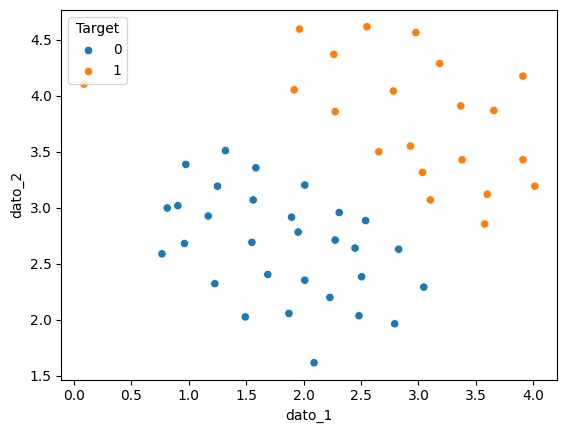

In [10]:
sns.scatterplot(data=df, x='dato_1', y='dato_2', hue='Target')

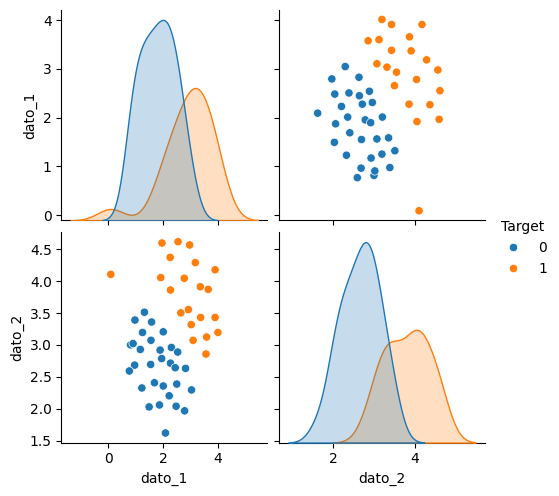

In [63]:
sns.pairplot(df, hue='Target');

<Axes: >

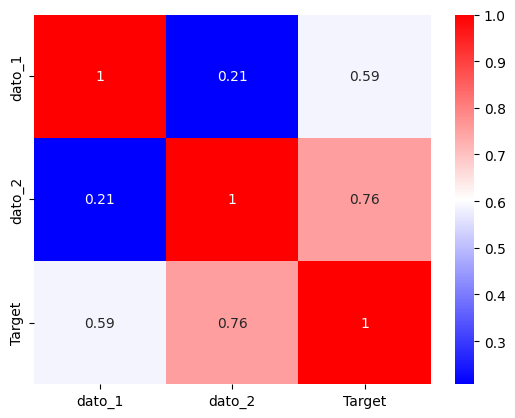

In [68]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='bwr')

Observe que hay un ejemplo positivo atípico que se aparta de los demás. Las clases siguen siendo linealmente separables, pero el ajuste es muy estrecho. Vamos a entrenar una máquina lineal de vectores soporte para aprender el límite (la frontera) de la clase.

#### 5. LinearSVC
Declara un *Linear SVC* con los hiperparámetros:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [11]:
'''#Dividimos datos y estandarizamos
x=df[['dato_1','dato_2']]
y=df['Target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)


escalado=MinMaxScaler() #minmax scaler va de 0 a 1. Con standard scaler los valores pueden sobresalir del 0 y 1
x_train=escalado.fit_transform(x_train) #fit transform porke se ajusta al train
x_test=escalado.transform(x_test) #aqui con transforn'''

"#Dividimos datos y estandarizamos\nx=df[['dato_1','dato_2']]\ny=df['Target']\n\nx_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)\n\n\nescalado=MinMaxScaler() #minmax scaler va de 0 a 1. Con standard scaler los valores pueden sobresalir del 0 y 1\nx_train=escalado.fit_transform(x_train) #fit transform porke se ajusta al train\nx_test=escalado.transform(x_test) #aqui con transforn"

In [95]:
'''#Creamos el vector de soporte
svc_linear=LinearSVC(C=1, loss='hinge', max_iter=10000, dual='auto', random_state=42)

#Entrenamiento
svc_linear.fit(x_train,y_train)

#Test
y_pred=svc_linear.predict(x_test)

print(accuracy_score(y_test,y_pred))'''

1.0


In [16]:
#Creamos el objeto
svc = LinearSVC(C=1, loss='hinge', max_iter=10000, dual='auto')

#### 6. Evalua el modelo (*score*)
Para este primer experimento usaremos `C=1` y veremos cómo se ajusta.

In [96]:
'''
#Creamos el vector de soporte
svc_linear=LinearSVC(C=1, loss='hinge', max_iter=10000, dual='auto', random_state=42)

#Validacion cruzada
scores=cross_val_score(svc_linear,x,y, cv=10, scoring='accuracy')
print("Accuracy para cada fold:", scores)
print("Precisión media: {:.2f}%".format(scores.mean() * 100))'''

Accuracy para cada fold: [1.  1.  1.  1.  1.  1.  1.  1.  1.  0.8]
Precisión media: 98.00%


In [17]:
#Separamos las variables explicativas  y la variable objetivo
x=df[['dato_1','dato_2']]
y=df['Target']

#Ajustamos el modelo a nuestro conjunto de datos
svc.fit(x,y)

#Tasa de acierto
svc.score(x,y)

0.9803921568627451

Parece que clasifica mal el *outlier*.

#### 7. Aumenta el valor de *C* hasta que obtengas un clasificador perfecto.

In [31]:
#Creamos el objeto
svc_2 = LinearSVC(C=350, loss='hinge', max_iter=10000, dual='auto', random_state=42)

#Ajustamos el modelo a nuestro conjunto de datos
svc_2.fit(x,y)

#Tasa de acierto
svc_2.score(x,y)

c:\Users\Bridgeschool37\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

Esta vez hemos obtenido una clasificación perfecta de los datos de entrenamiento, sin embargo, al aumentar el valor de C hemos creado un límite de decisión que ya no se ajusta naturalmente a los datos.  Podemos visualizar esto observando el nivel de confianza para cada predicción de clase, que es una función de la distancia del punto al hiperplano.

#### 8. Representar la función de decisión
Obtenga la salida de `decision_function()` para el primer modelo. Visualice un gráfico de dispersión con X1, X2 y un rango de colores basado en `decision_function()`.

La funcion de decision se refiere a la frontera (pintando un lado de un color y otro lado de otro color).
- El método decision_function devuelve las puntuaciones de decisión para cada muestra en el conjunto de datos x. Estas puntuaciones representan la distancia signada de cada muestra al hiperplano de decisión del SVM
-  Puedes utilizar estas puntuaciones para visualizar la confianza o nivel de certeza del clasificador en sus predicciones

In [32]:
conf_level=svc.decision_function(x)
conf_level

array([ 0.8027526 ,  0.38383469,  1.37740056,  0.52108729,  0.33332258,
        0.86861217,  0.68643754,  1.61111338,  0.8343982 ,  1.16704646,
        1.07315087,  0.2297275 ,  0.33175007,  0.79572724,  0.3157189 ,
        1.27400186,  1.21010255,  0.99988568,  0.56466214,  0.38981379,
       -0.4352933 , -0.30886828, -0.68627488, -0.55403571, -0.33252665,
       -0.29385569, -0.44071468, -0.98399529, -0.68564161, -1.32848719,
       -1.00380226, -1.4923216 , -0.61143844, -0.683466  , -1.00005541,
       -1.15275626, -1.57842255, -1.35600318, -1.03241989, -1.1850666 ,
       -0.77143911, -0.76694944, -0.46652843, -1.        , -0.51034757,
       -0.85864047, -1.55902979, -0.25490775, -1.11367235, -1.5472132 ,
       -0.70998692])

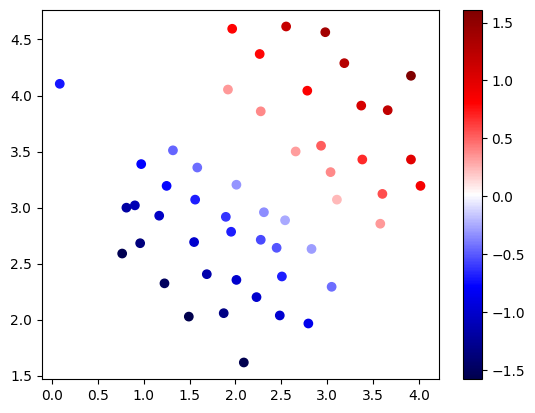

In [34]:
#c (simiar a hue): sobre que se colorean los puntos
plt.scatter(df['dato_1'], df['dato_2'], c=conf_level, cmap='seismic') 
plt.colorbar();

#Nos devuelve como divide los datos nuestro modelo

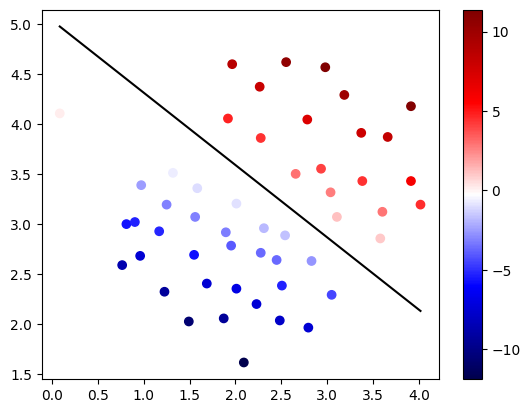

In [38]:
w = svc.coef_[0]
b = svc.intercept_[0]
x_points = df['dato_1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]

plt.scatter(df['dato_1'], df['dato_2'], c=conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

#### 9. Haz lo mismo con el segundo modelo

In [35]:
conf_level = svc_2.decision_function(x)
conf_level

array([  8.79154466,   4.44974424,  11.37728957,   4.09741156,
         0.96793843,   4.56177487,   4.47250186,  11.2102362 ,
         7.15094553,  10.55988766,   7.8359635 ,   1.17944568,
         4.83588745,   8.03020252,   2.97254044,   9.99998213,
         8.34343773,   5.93694478,   2.90997943,   2.72224166,
        -1.        ,  -0.90645192,  -4.0277156 ,  -3.64161671,
        -1.81152727,  -2.69078426,  -4.47018018,  -7.83628775,
        -5.3160907 ,  -9.37974534,  -6.90190896,  -9.28365015,
        -3.24730837,  -3.08703285,  -5.7914626 ,  -7.43244698,
       -10.64648849,  -7.48780082,  -5.18113991,  -5.66258373,
        -2.47145281,  -3.07963796,  -0.64946418,  -7.38125958,
        -3.66923193,  -7.48267643, -11.88087729,  -1.6809402 ,
        -5.26235643,  -8.67921687,   0.13422965])

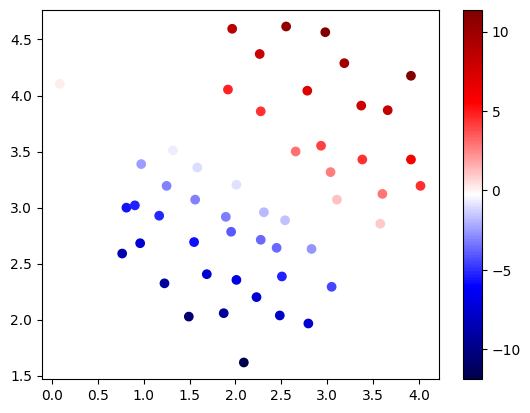

In [36]:
plt.scatter(df['dato_1'], df['dato_2'], c=conf_level, cmap='seismic') 
plt.colorbar();

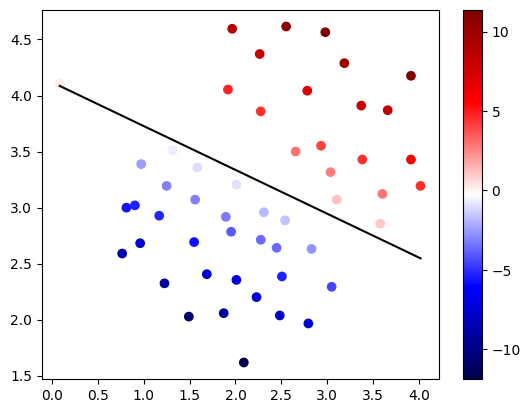

In [37]:
w = svc_2.coef_[0]
b = svc_2.intercept_[0]
x_points = df['dato_1'].sort_values()
y_points = -w[0]/w[1] * x_points - b/w[1]

plt.scatter(df['dato_1'], df['dato_2'], c=conf_level, cmap='seismic')
plt.plot(x_points, y_points, c='k')
plt.colorbar();

El objetivo del SVM es alejarse lo maximo posible a la frontera. Como vemos en este modelo hay puntos muy cerca de la frontera, lo que no es bueno (overfiting)

https://www.svm-tutorial.com/2015/06/svm-understanding-math-part-3/

Ahora vamos a pasar de un *SVM* lineal a uno que es capaz de realizar una clasificación no lineal utilizando *kernels*. Primero, tenemos la tarea de implementar una función de *kernel* gaussiano. Aunque scikit-learn tiene un *kernel* gaussiano incorporado, por transparencia vamos a implementar uno desde cero.

## Ejercicio 2

A continuación vamos a examinar otro conjunto de datos, esta vez con un límite de decisión no lineal.

#### 1. Carga los datos `ejer_1_data2.mat`

In [44]:
archivo_2 = sio.loadmat('./data/ejer_1_data2.mat')
archivo_2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

#### 2. Crea un DataFrame con las variables explicativas y la variable objetivo

In [46]:
df_2=pd.DataFrame(archivo_2['X'], columns=[['dato_1','dato_2']])
df_2['Target']=archivo_2['y']
df_2.head()

,dato_1,dato_2,Target
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [47]:
df_2.columns = df_2.columns.get_level_values(0) #Para que no coja como multitindice
df_2.columns

Index(['dato_1', 'dato_2', 'Target'], dtype='object')

In [51]:
df_2['Target'].value_counts(normalize='true')

Target
1    0.556199
0    0.443801
Name: proportion, dtype: float64

#### 3. Visualiza una gráfica de dispersión con los datos

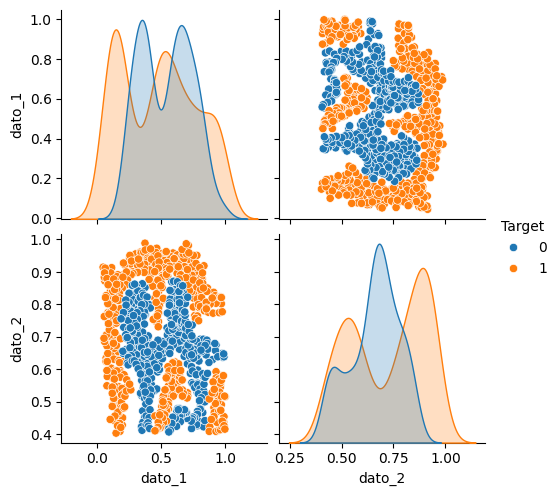

In [48]:
sns.pairplot(df_2, hue='Target');

<Axes: xlabel='dato_1', ylabel='dato_2'>

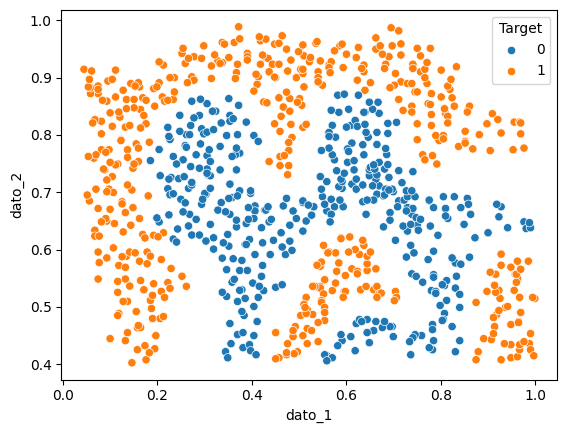

In [52]:
sns.scatterplot(data=df_2,x='dato_1',y='dato_2',hue='Target')

<Axes: >

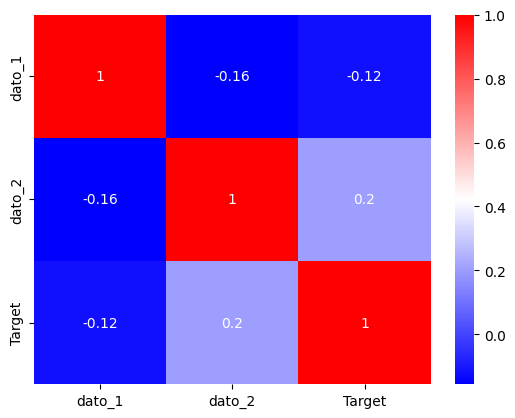

In [49]:
sns.heatmap(df_2.corr(numeric_only=True), annot=True, cmap='bwr')

Para este conjunto de datos construiremos un clasificador de máquina de vectores de soporte utilizando el núcleo RBF incorporado y examinaremos su precisión en los datos de entrenamiento. Para visualizar el límite de decisión, esta vez sombrearemos los puntos en función de la probabilidad prevista de que la instancia tenga una etiqueta de clase negativa. Veremos en el resultado que acierta en la mayoría de los casos.

#### 4. Declara un *SVC* con estos hiperparámetros
```Python
SVC(C=100, gamma=10, probability=True)
```

In [57]:
svm_clf = SVC(C=100, gamma=10, probability=True)

In [64]:
x=df_2[['dato_1','dato_2']]
y=df_2['Target']

#### 5.  Ajusta el clasificador y obten la bondad de ajuste del modelo

In [65]:
svm_clf.fit(x,y)
svm_clf.score(x,y) #El acuracy se hace con los test y train: accuracy_score(y_test, y_pred)

0.9698725376593279

#### 6. Visualiza el diagrama de dispersión y la probabilidad de predecir 0 con [*sequential color*](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

- y_pred=svm_clf.predict_proba(x): Este comando calcula las probabilidades estimadas de pertenencia a cada clase para cada muestra en el conjunto de datos x. El resultado y_pred es una matriz donde cada fila representa una muestra y cada columna representa la probabilidad estimada de pertenencia a una clase específica.

- y_pred[:, 0]: Con este índice [:, 0], se seleccionan todas las filas de la primera columna de la matriz y_pred. Esto significa que se están obteniendo las probabilidades estimadas para la primera clase (normalmente etiquetada como clase 0).

- y_pred[:, 1]: Probabilidades estimadas para la segunda clase.

In [66]:
y_pred=svm_clf.predict_proba(x)
y_pred[:,0]

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 7.13685909e-07,
       5.49191798e-03, 1.79127364e-05, 9.31896721e-08, 1.00855802e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.17771969e-02,
       1.02879863e-11, 3.00000090e-14, 3.00000090e-14, 4.60420771e-10,
       2.40820554e-01, 5.67097570e-01, 3.19442746e-14, 3.00000090e-14,
       1.37500999e-02, 1.03989323e-05, 8.26618295e-03, 1.16806810e-01,
       1.74728946e-02, 2.19614526e-06, 1.10292965e-06, 2.55346692e-07,
       3.19230702e-06, 2.18099414e-02, 1.54378656e-01, 2.67863319e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 4.13779646e-13, 3.82957577e-10, 5.26691772e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.68606241e-10,
       1.00520291e-13, 3.00000090e-14, 5.22129778e-09, 1.74671500e-07,
       1.02605005e-05, 1.21907655e-13, 3.00000090e-14, 3.00000090e-14,
      

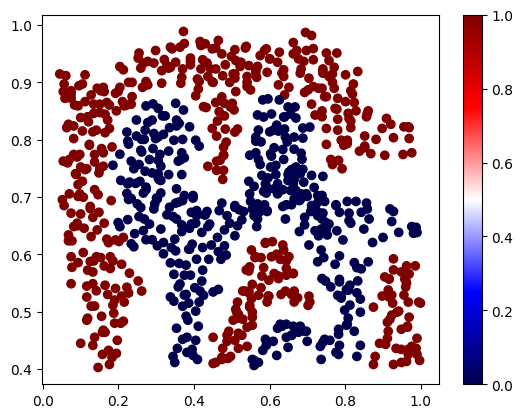

In [67]:
plt.scatter(df_2['dato_1'], df_2['dato_2'], c = y, cmap="seismic")
plt.colorbar()

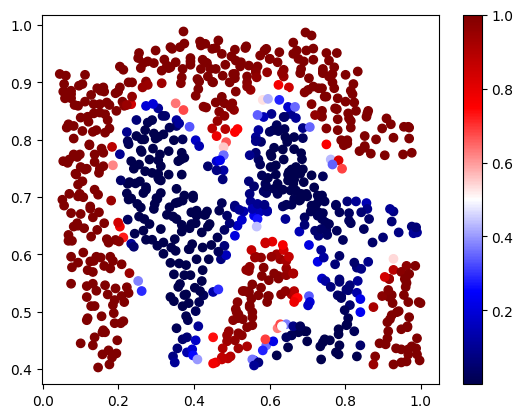

In [68]:
plt.scatter(df_2['dato_1'], df_2['dato_2'], c = y_pred[:,1], cmap="seismic")
plt.colorbar()

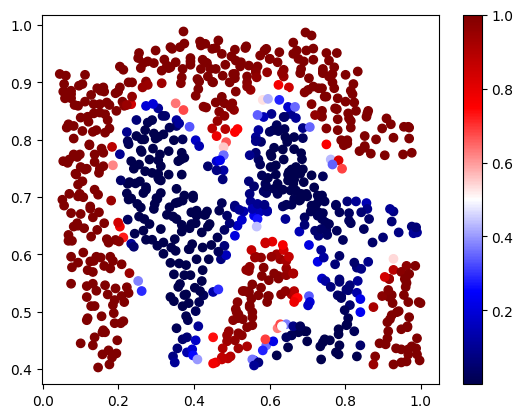

In [69]:
svc = SVC(C=1000, gamma=10, probability=True)
svc.fit(x,y)
y_pred_proba = svc.predict_proba(x)

plt.scatter(df_2['dato_1'], df_2['dato_2'], c = y_pred[:,1], cmap="seismic")
plt.colorbar()